# Image Resizing
When resizing an image:

It is important to keep in mind the original aspect ratio of the image (i.e. width by height), if you want to maintain the same in the resized image too.
Reducing the size of an image will require resampling of the pixels. 
Increasing the size of an image requires reconstruction of the image. This means you need to interpolate new pixels.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_PATH_BSE = "/content/drive/MyDrive/geohackathon/Images/BSE/Image15_40.tif"
IMAGE_PATH_CL = "/content/drive/MyDrive/geohackathon/Images/CL/Image15_40.tif"


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
image_bse = cv2.imread(IMAGE_PATH_BSE)
# image_bse = cv2.cvtColor(image_bse, cv2.COLOR_BGR2RGB)

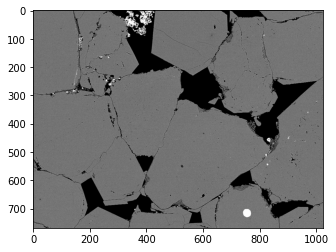

In [ ]:
plt.imshow(image_bse)

In [ ]:
image_bse.shape

(768, 1024, 3)

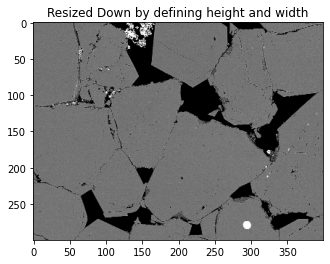

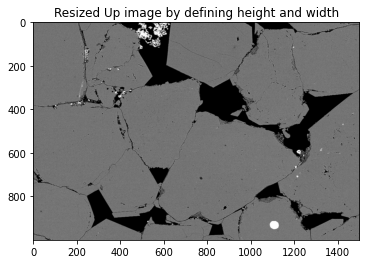

In [ ]:
## Resizing by Specifying Width and Height

# let's downscale the image using new  width and height
down_width = 400
down_height = 300
down_points = (down_width, down_height)
resized_down = cv2.resize(image_bse, down_points, interpolation= cv2.INTER_LINEAR)

# let's upscale the image using new  width and height
up_width = 1500
up_height = 1000
up_points = (up_width, up_height)
resized_up = cv2.resize(image_bse, up_points, interpolation= cv2.INTER_LINEAR)

# Display images
plt.imshow(resized_down)
plt.title("Resized Down by defining height and width")
plt.show()
plt.imshow(resized_up)
plt.title("Resized Up image by defining height and width")
plt.show()

In [ ]:
## Resizing With a Scaling Factor
# Scaling Factor or Scale Factor is usually a number that scales or 
# multiplies some quantity, in our case the width and height of the image. 
# It helps keep the aspect ratio intact and preserves the display quality. 
# So the image does not appear distorted, while you are upscaling or downscaling it.

# Scaling Up the image 1.2 times by specifying both scaling factors
scale_up_x = 1.2
scale_up_y = 1.2
# Scaling Down the image 0.6 times specifying a single scale factor.
scale_down = 0.6

scaled_f_down = cv2.resize(image_bse, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(image_bse, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)


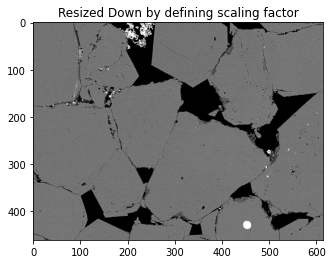

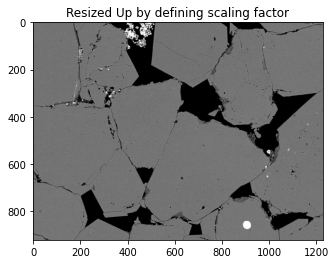

In [ ]:
plt.imshow(scaled_f_down)
plt.title("Resized Down by defining scaling factor")
plt.show()

plt.imshow(scaled_f_up)
plt.title("Resized Up by defining scaling factor")
plt.show()

# Image Rotation and Translation/Shifting

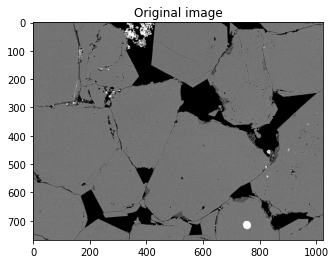

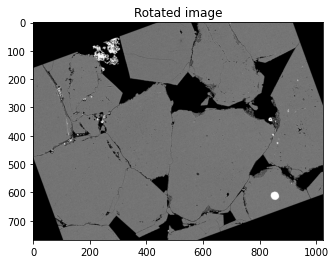

In [ ]:
# dividing height and width by 2 to get the center of the image
height, width = image_bse.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
# If the angle is positive, the image gets rotated in the counter-clockwise direction. 
# If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image_bse, M=rotate_matrix, dsize=(width, height))

plt.imshow(image_bse)
plt.title("Original image")
plt.show()

plt.imshow(rotated_image)
plt.title("Rotated image")
plt.show()


In [ ]:
rotate_matrix

array([[   0.93969262,    0.34202014, -100.45835688],
       [  -0.34202014,    0.93969262,  198.272347  ]])

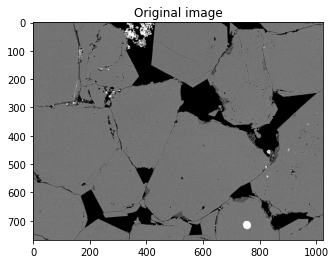

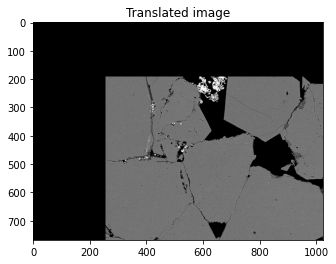

In [ ]:
# get the width and height of the image
height, width = image_bse.shape[:2]

# get tx and ty values for translation
# you can specify any value of your choice
tx, ty = width / 4, height / 4

# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

# apply the translation to the image
translated_image = cv2.warpAffine(
    src=image_bse, 
    M=translation_matrix, 
    dsize=(width, height)
)

plt.imshow(image_bse)
plt.title("Original image")
plt.show()

plt.imshow(translated_image)
plt.title("Translated image")
plt.show()

# Color Spaces

## Lab Color Space

The Lab color space has three components.

- L – Lightness ( Intensity ).
- a – color component ranging from Green to Magenta.
- b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color

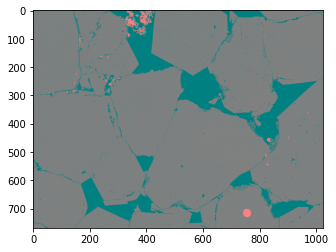

In [ ]:
image_bse_lab = cv2.cvtColor(image_bse, cv2.COLOR_BGR2LAB)
plt.imshow(image_bse_lab)

In [ ]:
image_bse_lab.shape

(768, 1024, 3)

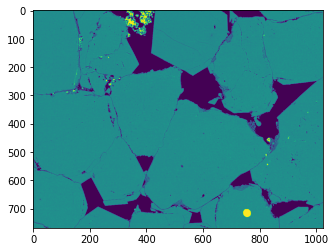

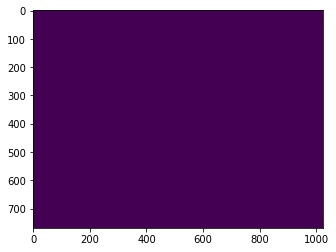

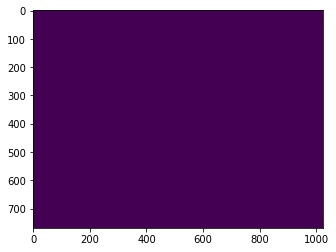

In [ ]:
plt.imshow(image_bse_lab[:,:,0])
plt.show()
plt.imshow(image_bse_lab[:,:,1])
plt.show()
plt.imshow(image_bse_lab[:,:,2])
plt.show()

## YCrCb Color Space

The YCrCb color space is derived from the RGB color space and has the following three compoenents.

- Y – Luminance or Luma component obtained from RGB after gamma correction.
- Cr = R – Y ( how far is the red component from Luma ).
- Cb = B – Y ( how far is the blue component from Luma ).

YCbCr (also Y'CbCr, Y Pb/Cb Pr/Cr) is a family of color spaces used in videos and digital photography that separates brightness (luma) from chroma (color). Green is naturally included as part of brightness because it's the color people.



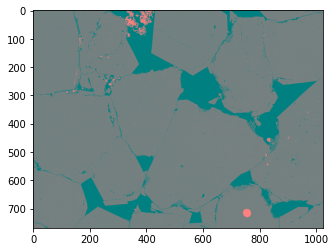

In [ ]:
image_bse_ycb = cv2.cvtColor(image_bse, cv2.COLOR_BGR2YCrCb)
plt.imshow(image_bse_ycb)

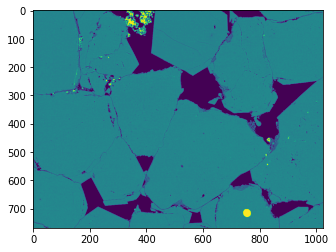

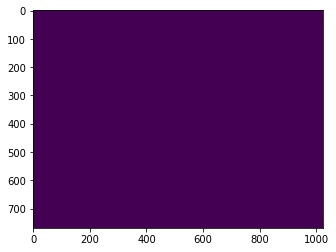

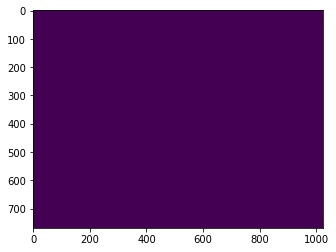

In [ ]:
plt.imshow(image_bse_ycb[:,:,0])
plt.show()
plt.imshow(image_bse_ycb[:,:,1])
plt.show()
plt.imshow(image_bse_ycb[:,:,2])
plt.show()

## HSV or HSB Color Space

he HSV color space has the following three components

- H – Hue ( Dominant Wavelength ).
- S – Saturation ( Purity / shades of the color ).
- V – Value ( Intensity ).



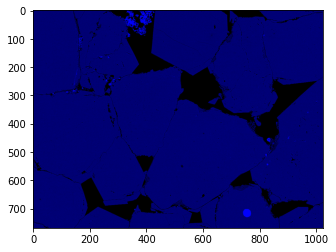

In [ ]:
image_bse_hsv = cv2.cvtColor(image_bse, cv2.COLOR_BGR2HSV)
plt.imshow(image_bse_hsv)

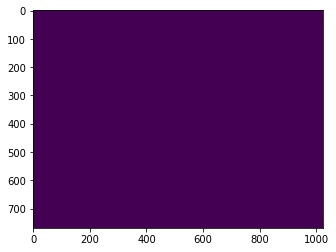

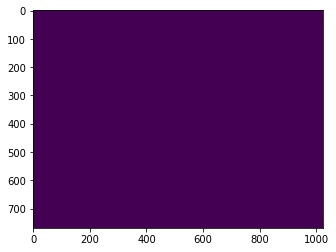

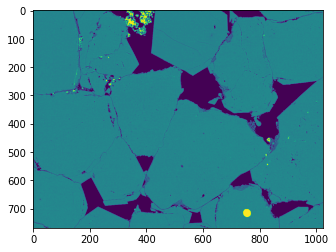

In [ ]:
plt.imshow(image_bse_hsv[:,:,0])
plt.show()
plt.imshow(image_bse_hsv[:,:,1])
plt.show()
plt.imshow(image_bse_hsv[:,:,2])
plt.show()

# Segmentation

Extract all pixels from the image which have values close to that of a specific pixel. We can take a range of +/- X for each color space and check how the results look like. We will use the opencv function `inRange` for finding the `mask` of the selected color pixels and then use `bitwise_and` operation to get the green pixels from the image using the `mask`.

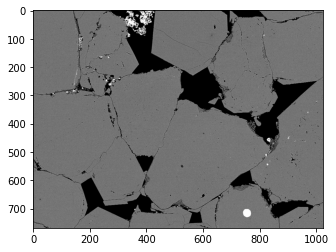

In [ ]:
plt.imshow(image_bse)

In [ ]:
bgr = [10, 10, 30]
np.uint8([[bgr]]).shape, cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2HSV)[0][0]

((1, 1, 3), array([  0, 170,  30], dtype=uint8))

In [ ]:
def segmentation(image_bgr, image_hsv, image_ycb, image_lab, bgr, thresh):
    minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
    maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])

    maskBGR = cv2.inRange(image_bgr,minBGR,maxBGR)
    resultBGR = cv2.bitwise_and(image_bgr, image_bgr, mask = maskBGR)

    #convert 1D array to 3D, then convert it to HSV and take the first element
    hsv = cv2.cvtColor( np.uint8([[bgr]]), cv2.COLOR_BGR2HSV)[0][0]

    minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
    maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])

    maskHSV = cv2.inRange(image_hsv, minHSV, maxHSV)
    resultHSV = cv2.bitwise_and(image_hsv, image_hsv, mask = maskHSV)

    #convert 1D array to 3D, then convert it to YCrCb and take the first element
    ycb = cv2.cvtColor( np.uint8([[bgr]]), cv2.COLOR_BGR2YCrCb)[0][0]

    minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
    maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])

    maskYCB = cv2.inRange(image_ycb, minYCB, maxYCB)
    resultYCB = cv2.bitwise_and(image_ycb, image_ycb, mask = maskYCB)

    #convert 1D array to 3D, then convert it to LAB and take the first element
    lab = cv2.cvtColor( np.uint8([[bgr]]), cv2.COLOR_BGR2LAB)[0][0]

    minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
    maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])

    maskLAB = cv2.inRange(image_lab, minLAB, maxLAB)
    resultLAB = cv2.bitwise_and(image_lab, image_lab, mask = maskLAB)

    def plot_original_segmented(original, segmented, title):
        plt.figure(figsize=[10, 15])
        plt.subplot(1,2,1)
        plt.imshow(original)
        plt.ylabel(title)
        plt.subplot(1,2,2)
        plt.imshow(segmented)
        plt.show()

    plot_original_segmented(image_bgr, resultBGR, "BGR")
    plot_original_segmented(image_hsv, resultHSV, "HSV")
    plot_original_segmented(image_ycb, resultYCB, "YCB")
    plot_original_segmented(image_lab, resultLAB, "LAB")


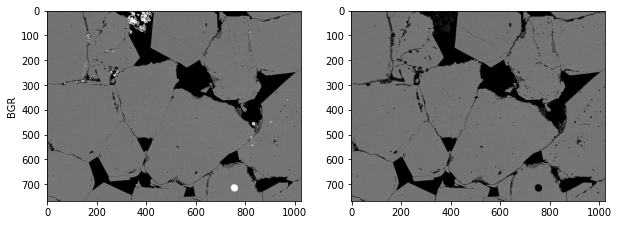

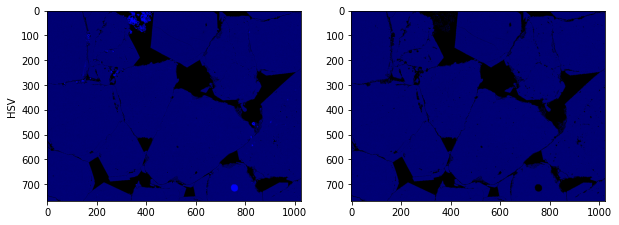

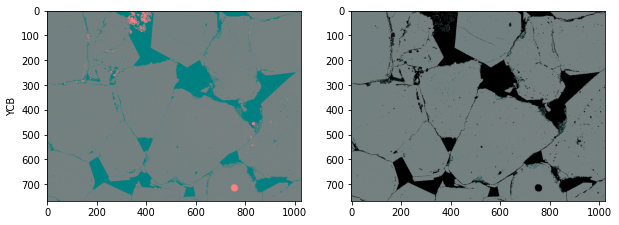

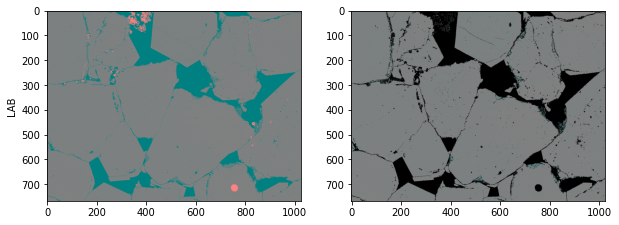

In [ ]:
bgr = image_bse[10, 10, :]
thresh = 40

segmentation(image_bse, image_bse_hsv, image_bse_ycb, image_bse_lab, bgr, thresh)

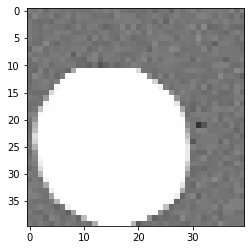

In [ ]:
plt.imshow(image_bse[690:730, 740:780, :])

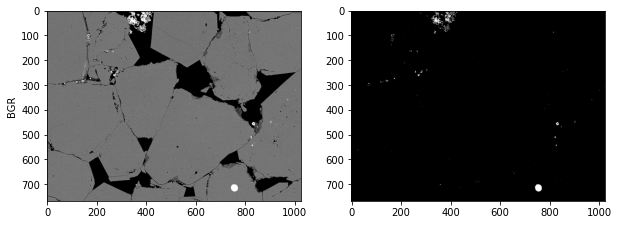

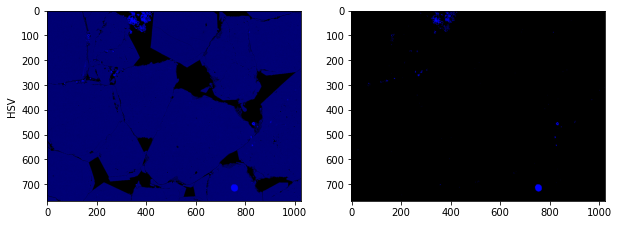

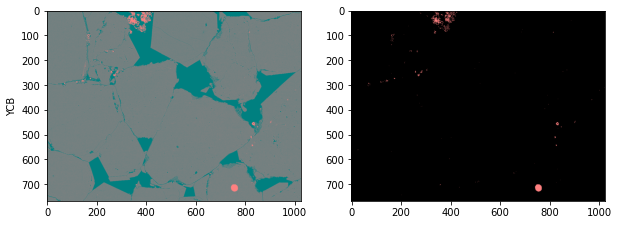

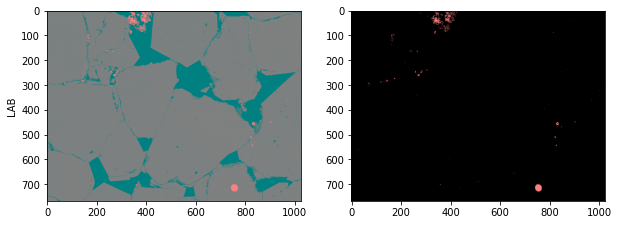

In [ ]:
bgr = image_bse[710, 755, :]
thresh = 5

segmentation(image_bse, image_bse_hsv, image_bse_ycb, image_bse_lab, bgr, thresh)